## 이동 평균과 이동 표준 편차를 사용한 이상치 탐지 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.max_rows', 500)

#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

          Date     Value
0   2023-01-01  0.397623
1   2023-01-02  1.126401
2   2023-01-03  0.041243
3   2023-01-04  0.079855
4   2023-01-05  1.393543
5   2023-01-06  0.658439
6   2023-01-07 -0.121569
7   2023-01-08  1.019485
8   2023-01-09  0.003173
9   2023-01-10  1.201003
10  2023-01-11 -0.004137
11  2023-01-12 -0.791067
12  2023-01-13 -2.179705
13  2023-01-14  0.305819
14  2023-01-15 -0.949886
15  2023-01-16 -0.628190
16  2023-01-17  1.542255
17  2023-01-18 -0.048741
18  2023-01-19  1.361947
19  2023-01-20  0.521889
20  2023-01-21  0.121924
21  2023-01-22 -0.105516
22  2023-01-23  0.477189
23  2023-01-24 -1.510162
24  2023-01-25 -0.015318
25  2023-01-26  0.494063
26  2023-01-27  2.160793
27  2023-01-28  0.469211
28  2023-01-29  0.200465
29  2023-01-30  1.595269
30  2023-01-31 -0.987045
31  2023-02-01  0.546750
32  2023-02-02 -1.724869
33  2023-02-03  0.682885
34  2023-02-04  0.662366
35  2023-02-05  0.149926
36  2023-02-06 -0.447592
37  2023-02-07  1.129472
38  2023-02-08 -0.206612


### 이동 평균과 이동 표준편차 계산

In [7]:
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()
print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.510791
7      0.599628
8      0.439167
9      0.604847
10     0.592848
11     0.280761
12    -0.124688
13    -0.063633
14    -0.344971
15    -0.435166
16    -0.386416
17    -0.392788
18    -0.085215
19     0.300727
20     0.274457
21     0.395081
22     0.552992
23     0.116933
24     0.121708
25    -0.002276
26     0.231853
27     0.281466
28     0.325177
29     0.484903
30     0.559634
31     0.639930
32     0.322939
33     0.111809
34     0.139403
35     0.132183
36    -0.159654
37     0.142705
38     0.035082
39     0.405539
40     0.472574
41     0.607016
42     0.691371
43     0.717945
44     0.667836
45     0.655937
46     0.548822
47     0.433501
48     0.284168
49     0.122483
50    -0.212148
51    -0.443149
52    -0.438837
53    -0.489925
54    -0.526419
55    -0.626955
56    -0.662395
57    -0.005911
58    -0.025020
59    -0.104759
60     0.002515
61    -0.032011
62     0

### 임계값 설정, 이상치 탐지

In [8]:
threahold_multiplier = 2 #임계값 계수
data['Threshold'] = data['MovingAverage'] + threahold_multiplier * data['MovingStd']

#print(data['Threshold'])

#이상치 탐지 -> 임계값을 초과하는 경우는 True(이상치)로 실행합니다.
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57      True
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

### 시각화

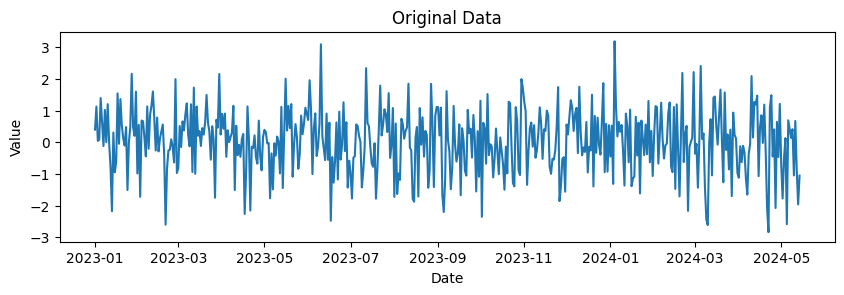

In [10]:
# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
plt.show()

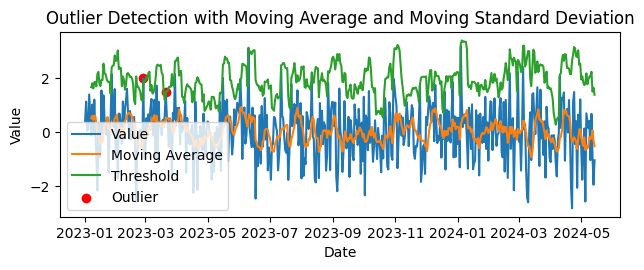

In [12]:
# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()
plt.tight_layout()

## 지수 평활법을 사용한 이상치 탐지 실습

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] + [10] * 90  #이상치 포함된 데이터
"""
values 는 10, 12, 11, 15, 9, 13, 8, 14, 10, 16으로 시작하고, 
그 뒤에 10이 총 90번 반복되는 형태입니다. 이렇게 반복되는 10은 이상치로 간주될 수 있습니다.
"""


#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date  Value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
5  2023-01-06     13
6  2023-01-07      8
7  2023-01-08     14
8  2023-01-09     10
9  2023-01-10     16
10 2023-01-11     10
11 2023-01-12     10
12 2023-01-13     10
13 2023-01-14     10
14 2023-01-15     10
15 2023-01-16     10
16 2023-01-17     10
17 2023-01-18     10
18 2023-01-19     10
19 2023-01-20     10
20 2023-01-21     10
21 2023-01-22     10
22 2023-01-23     10
23 2023-01-24     10
24 2023-01-25     10
25 2023-01-26     10
26 2023-01-27     10
27 2023-01-28     10
28 2023-01-29     10
29 2023-01-30     10
30 2023-01-31     10
31 2023-02-01     10
32 2023-02-02     10
33 2023-02-03     10
34 2023-02-04     10
35 2023-02-05     10
36 2023-02-06     10
37 2023-02-07     10
38 2023-02-08     10
39 2023-02-09     10
40 2023-02-10     10
41 2023-02-11     10
42 2023-02-12     10
43 2023-02-13     10
44 2023-02-14     10
45 2023-02-15     10
46 2023-02-16

### 지수 평활법 모델 학습

In [17]:
model = ExponentialSmoothing(data['Value'], trend='add')
model_fit = model.fit()

In [20]:
#추세 계산
trend = model_fit.predict(start=0, end=len(data['Value']) - 1)

#추세에서의 편차 계산
deviation = data['Value'] - trend

### 이상치 탐지 및 시각화

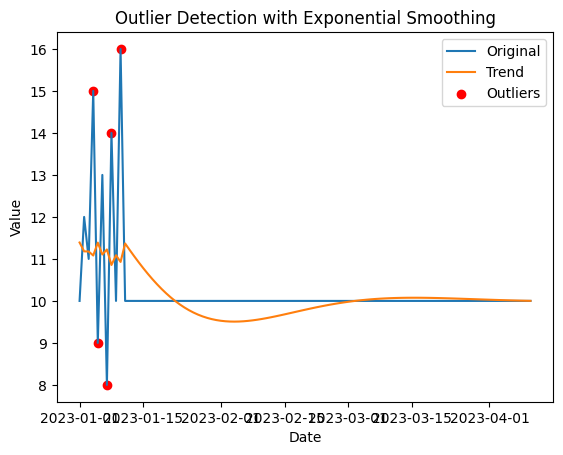

In [21]:
#이상치 탐지
threshold = 2
outliers = abs(deviation)  > threshold

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.show()

## Z-점수 기반 이상치 탐지 실습

In [22]:
from scipy import stats

In [23]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

#이상치 추가
values[20] = 50

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date      Value
0  2023-01-01  -0.111510
1  2023-01-02  -1.269731
2  2023-01-03   1.375395
3  2023-01-04   0.546291
4  2023-01-05   0.805883
5  2023-01-06  -0.562719
6  2023-01-07   0.018787
7  2023-01-08  -0.878194
8  2023-01-09  -1.220211
9  2023-01-10   0.564318
10 2023-01-11  -0.713263
11 2023-01-12   1.503716
12 2023-01-13  -0.445189
13 2023-01-14  -1.058060
14 2023-01-15   0.907221
15 2023-01-16  -0.520597
16 2023-01-17  -0.318335
17 2023-01-18   0.381978
18 2023-01-19  -0.430864
19 2023-01-20  -0.266453
20 2023-01-21  50.000000
21 2023-01-22   0.647728
22 2023-01-23   0.600216
23 2023-01-24  -1.560968
24 2023-01-25  -0.527630
25 2023-01-26  -0.876804
26 2023-01-27   0.201071
27 2023-01-28   0.334995
28 2023-01-29  -1.188077
29 2023-01-30   0.746604
30 2023-01-31  -0.593853
31 2023-02-01   1.210256
32 2023-02-02  -0.004939
33 2023-02-03   0.857853
34 2023-02-04  -0.057035
35 2023-02-05   0.939328
36 2023-02-06  -0.587256
37 2023-02-07   0.734907
38 2023-02-08   0.702329


### 이상치 탐지

In [24]:
#z_scores 계산
z_scores = np.abs(stats.zscore(data['Value']))

#임계값
threshold = 3

#z_scores가 임계값을 초과하는지 확인
outliers = z_scores > threshold

### 시각화

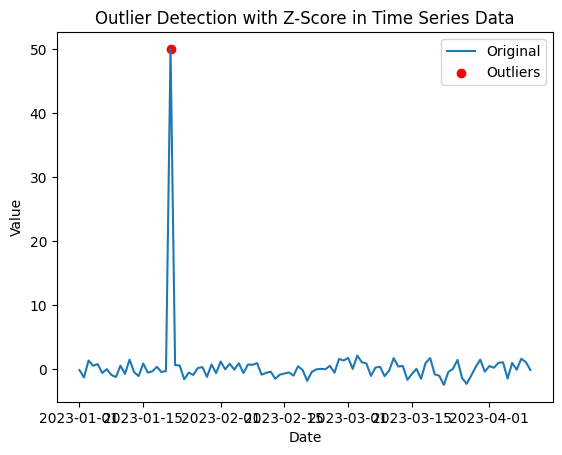

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [26]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)

## 스무딩 실습

### 시계열 데이터, 데이터 프레임, 원본 시계열 데이터 시각화

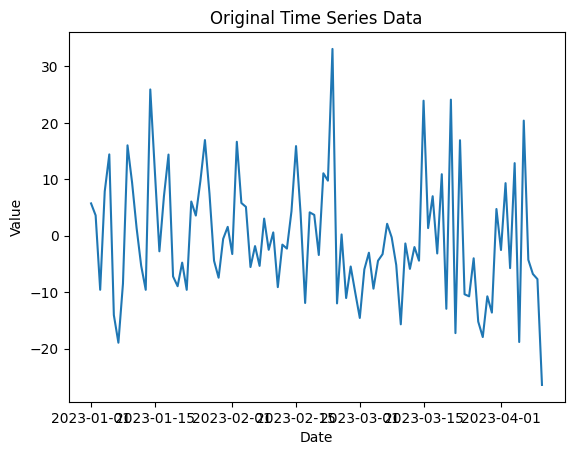

In [28]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 #정규분포를 따르는 데이터 생성

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.show()

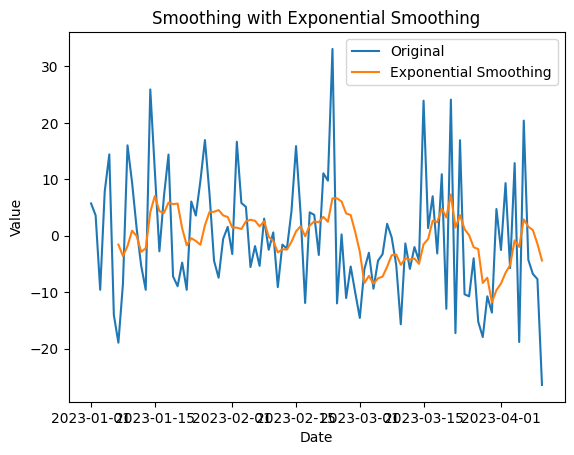

In [31]:
#이동평균을 사용한 스무딩
window_size = 7  #이동평균 윈도우 크기 설정

data['ExponentialSmoothing'] = data['Value'].rolling(window=window_size).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()
plt.show()